In [1]:
import pandas as pd 
from pandas import DataFrame,Series
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
%matplotlib inline

In [2]:
dt=pd.read_excel(r'C:\Users\rowid\Desktop\Invesments\Bassem Match Betting.xlsx')

In [3]:
dt.head()

,Match_Date,Team Bet on,Coins Staked,Odds,Potenail Return,Profit,Bet Type,State,Cash Flow,Unnamed: 9,init invesment,120
0,2021-08-20,Vitality,420,1.73,726.6,306.6,Correct Score,W,11106.0,NaN,NaN,NaN
1,2021-08-20,Blink,420,1.50,630.0,-420.0,Winner,L,10686.0,NaN,init invesment in coins,10800.0
2,2021-08-20,G2,420,1.67,701.4,-420.0,Winner,L,10266.0,NaN,NaN,NaN
3,2021-08-20,OG,420,1.40,588.0,168.0,1 Map,W,10434.0,NaN,Bouns,5.0
4,2021-08-20,Vp,420,1.73,726.6,-420.0,1 Map,L,10014.0,NaN,NaN,NaN


In [4]:
dt.dtypes

Match_Date         datetime64[ns]
Team Bet on                object
Coins Staked                int64
Odds                      float64
Potenail Return           float64
Profit                    float64
Bet Type                   object
State                      object
Cash Flow                 float64
Unnamed: 9                float64
init invesment             object
120                       float64
dtype: object

In [5]:
Teams_Profit=dt.groupby(['Team Bet on'])['Profit'].sum()

In [6]:
Teams_Profit

Team Bet on
AGO                     496.80
Astralis                401.10
Big                    -775.00
Blink                  -420.00
CPH                      26.49
Dignitas                353.92
Ence                    159.60
Entropiq               -767.00
Faze                   -778.55
Fnatic                 -748.00
Forze                  1653.40
G2                    -2485.40
GXR                    -364.00
Gambit                 -467.00
Heroic                  180.00
K23                    -348.00
LDLC                    705.60
Liquid                  300.00
Lyngby Vikings         1040.44
Mibr                   -300.00
Mouz                   -159.94
Navi                   -431.50
Nip                     763.18
OG                     1247.97
Paris Saint-Germain    -411.00
Sinners                 108.50
Skade                   329.24
VP                      222.30
Vitality                162.10
Vp                      -29.80
complexity            -1153.50
none                     -8

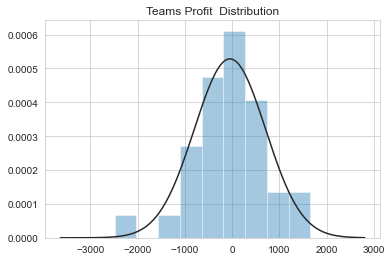

In [7]:
from scipy.stats import norm
sns.set_style('whitegrid')
plt.title('Teams Profit  Distribution')
sns.distplot(Teams_Profit.values,kde=False,fit=norm)
plt.show()

In [8]:
from scipy.stats import shapiro
w,a= shapiro(Teams_Profit)

In [9]:
from scipy.stats import skew
skew(Teams_Profit.values)

-0.5715972982897787

((array([-2.02511189, -1.62590278, -1.38593914, -1.20666642, -1.05953591,
         -0.93235918, -0.81872017, -0.71478609, -0.6180591 , -0.52680137,
         -0.43973827, -0.35589149, -0.27447843, -0.19484777, -0.11643566,
         -0.03873405,  0.03873405,  0.11643566,  0.19484777,  0.27447843,
          0.35589149,  0.43973827,  0.52680137,  0.6180591 ,  0.71478609,
          0.81872017,  0.93235918,  1.05953591,  1.20666642,  1.38593914,
          1.62590278,  2.02511189]),
  array([-2485.4 , -1153.5 ,  -778.55,  -775.  ,  -767.  ,  -748.  ,
          -467.  ,  -431.5 ,  -420.  ,  -411.  ,  -364.  ,  -348.  ,
          -300.  ,  -159.94,   -29.8 ,    -8.  ,    26.49,   108.5 ,
           159.6 ,   162.1 ,   180.  ,   222.3 ,   300.  ,   329.24,
           353.92,   401.1 ,   496.8 ,   705.6 ,   763.18,  1040.44,
          1247.97,  1653.4 ])),
 (768.8249981551977, -46.751562499999956, 0.966068669828835))

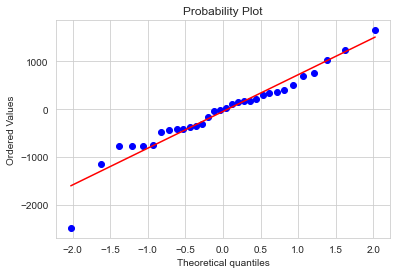

In [10]:
from scipy.stats import probplot
probplot(Teams_Profit.values,plot=plt)

In [14]:
# compare Teams Based on the Z score(measure is : Team profit )
Teams_Profit_dt=DataFrame({'Team Name':Teams_Profit.index,
                           'Team Profit':Teams_Profit.values
                           })

In [16]:
Teams_Profit_Avg=np.average(Teams_Profit.values)

In [18]:
Teams_Profit_Sd=np.std(Teams_Profit.values)

In [20]:
Teams_Profit_dt['Z-Score']=(Teams_Profit_dt['Team Profit']-Teams_Profit_Avg)/Teams_Profit_Sd

In [24]:
Teams_Profit_dt.sort_values(by=['Z-Score'],ascending=False,inplace=True)

In [26]:
Teams_Profit_dt.head(5)

,Team Name,Team Profit,Z-Score
10,Forze,1653.40,2.251689
23,OG,1247.97,1.714736
18,Lyngby Vikings,1040.44,1.439882
22,Nip,763.18,1.072677
16,LDLC,705.60,0.996418
